## Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import joblib


## Load Dataset

In [3]:
file_path = "../Dataset/heart_disease_uci.csv"
print(f"Mencoba memuat dataset dari: {file_path}")
df = None
model_filename = None

try:
    df = pd.read_csv(file_path, na_values='?')
    print("Dataset berhasil dimuat.")
    print(f"Jumlah baris awal: {len(df)}, Jumlah kolom awal: {len(df.columns)}")
    print(df.head())
except FileNotFoundError:
    print(f"ERROR: FileNotFoundError. File '{file_path}' tidak ditemukan.")
    exit()
except Exception as e:
    print(f"Error saat memuat dataset: {e}")
    exit()

Mencoba memuat dataset dari: ../Dataset/heart_disease_uci.csv
Dataset berhasil dimuat.
Jumlah baris awal: 920, Jumlah kolom awal: 16
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed d

In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


## EDA

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pengaturan untuk tampilan plot yang lebih baik
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12


Melanjutkan EDA dengan DataFrame 'df' yang sudah ada...

--- Menangani dan Memvisualisasikan Nilai yang Hilang ---
Informasi nilai yang hilang:
          Jumlah Hilang  Persentase Hilang (%)
ca                  611              66.413043
thal                486              52.826087
slope               309              33.586957
fbs                  90               9.782609
oldpeak              62               6.739130
trestbps             59               6.413043
thalch               55               5.978261
exang                55               5.978261
chol                 30               3.260870
restecg               2               0.217391


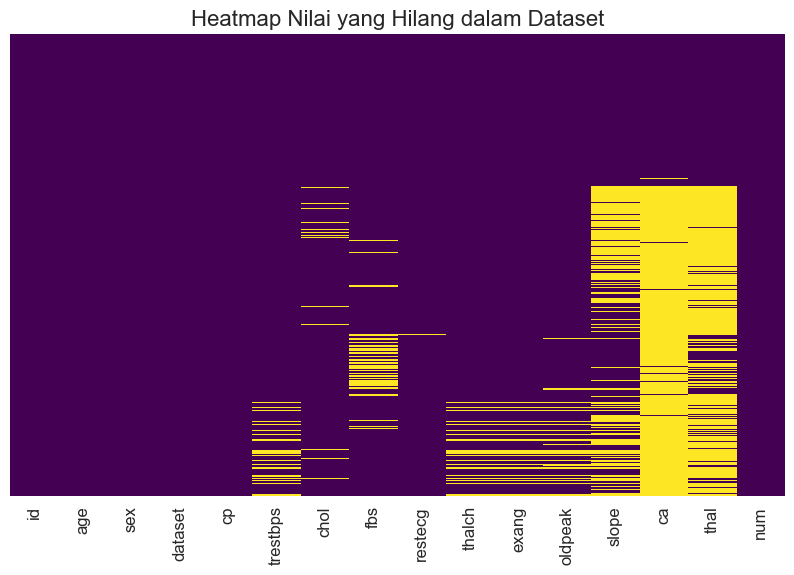

In [6]:
# Pastikan df ada sebelum melanjutkan
if 'df' not in locals() or df is None:
    print("ERROR DataFrame 'df' tidak terdefinisi atau None.")
    print("Harap muat dan proses DataFrame 'df' sebelum menjalankan bagian EDA ini.")
else:
    print("Melanjutkan EDA dengan DataFrame 'df' yang sudah ada...")

    # Memvisualisasikan nilai yang hilang
    print("\n--- Menangani dan Memvisualisasikan Nilai yang Hilang ---")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_info = pd.DataFrame({'Jumlah Hilang': missing_values, 'Persentase Hilang (%)': missing_percentage})
    missing_info = missing_info[missing_info['Jumlah Hilang'] > 0].sort_values(by='Persentase Hilang (%)', ascending=False)
    print("Informasi nilai yang hilang:")
    print(missing_info)

    if not missing_info.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
        plt.title('Heatmap Nilai yang Hilang dalam Dataset')
        plt.show()
    else:
        print("\nTidak ada nilai yang hilang dalam dataset (berdasarkan pengecekan saat ini).")


Untuk mengetahui kolom mana saja yang memiliki data kosong, kita menghitung persentase nilai yang hilang dan menampilkannya dalam bentuk heatmap. Visualisasi ini sangat efektif untuk melihat secara cepat kolom mana yang paling banyak memiliki data kosong (ditandai dengan warna terang).

Distribusi nilai pada kolom 'num' (target asli):
num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

Kolom 'target' biner telah dibuat.

Distribusi nilai pada kolom 'target' (biner):
target
0    411
1    509
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_3932\3815467218.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='pastel')


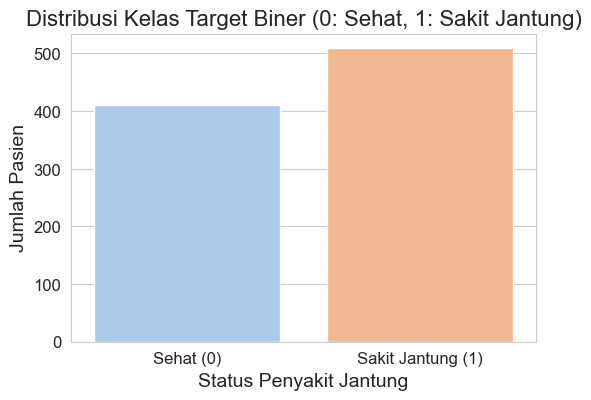

In [7]:
if 'num' in df.columns:
    print("Distribusi nilai pada kolom 'num' (target asli):")
    print(df['num'].value_counts(dropna=False).sort_index())

    # Membuat kolom target biner jika belum ada
    if 'target' not in df.columns:
        df['target'] = df['num'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)
        print("\nKolom 'target' biner telah dibuat.")

    print("\nDistribusi nilai pada kolom 'target' (biner):")
    print(df['target'].value_counts(dropna=False).sort_index())

    plt.figure(figsize=(6, 4))
    sns.countplot(x='target', data=df, palette='pastel')
    plt.title('Distribusi Kelas Target Biner (0: Sehat, 1: Sakit Jantung)')
    plt.xlabel('Status Penyakit Jantung')
    plt.ylabel('Jumlah Pasien')
    plt.xticks([0, 1], ['Sehat (0)', 'Sakit Jantung (1)'])
    plt.show()
else:
    print("Kolom 'num' tidak ditemukan. Tidak dapat membuat atau menganalisis variabel target 'num'.")


Variabel target asli, num, berisi tingkat keparahan penyakit dari 0 (sehat) hingga 4. Untuk model klasifikasi biner, kita membuat kolom baru bernama target yang berisi nilai 0 (Sehat) dan 1 (Sakit Jantung). Distribusi kelas ini kemudian divisualisasikan menggunakan countplot untuk memeriksa apakah jumlah data antara kedua kelas seimbang atau tidak.


--- Analisis Univariat ---

Identifikasi Fitur Numerik untuk EDA: ['age', 'chol', 'thalch']
Identifikasi Fitur Kategorikal untuk EDA: ['sex', 'cp']

Distribusi Fitur Numerik:


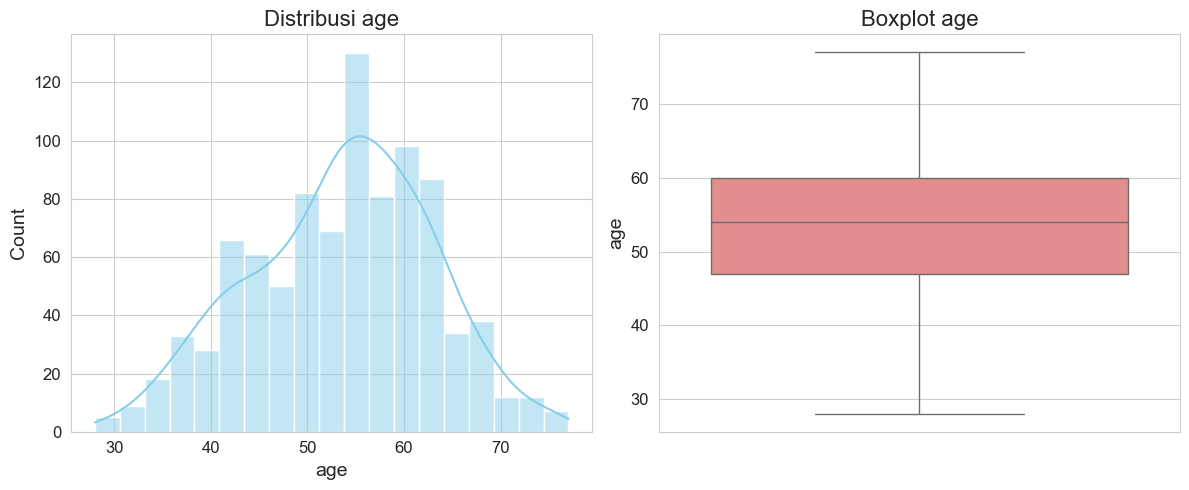

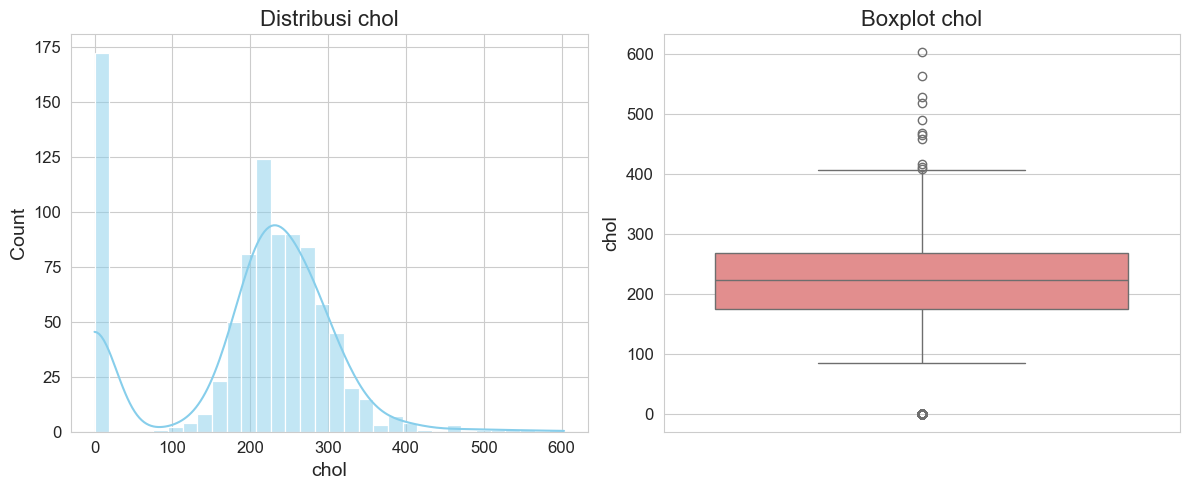

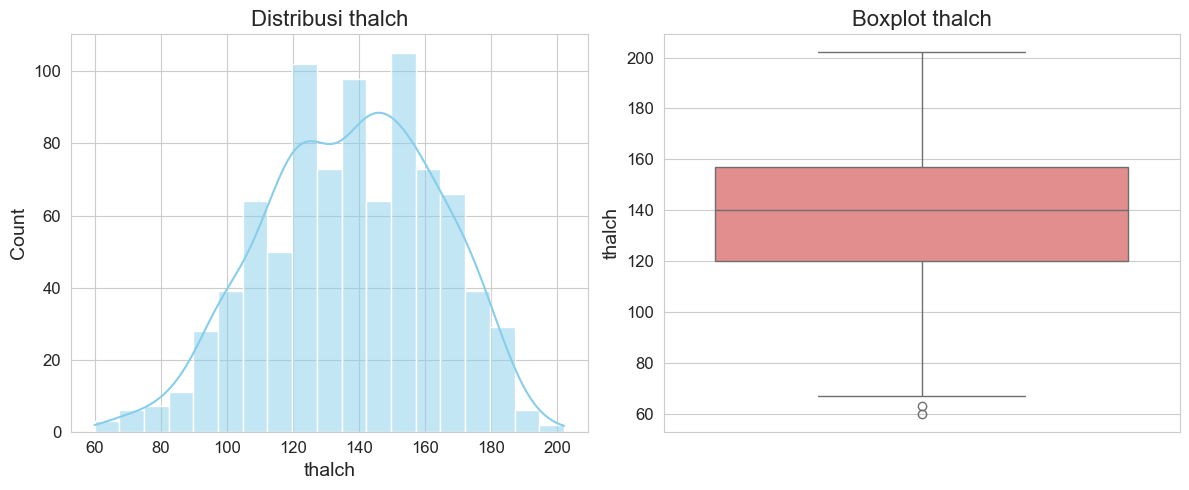


Distribusi Fitur Kategorikal:


C:\Users\USER\AppData\Local\Temp\ipykernel_3932\1114362834.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=order)


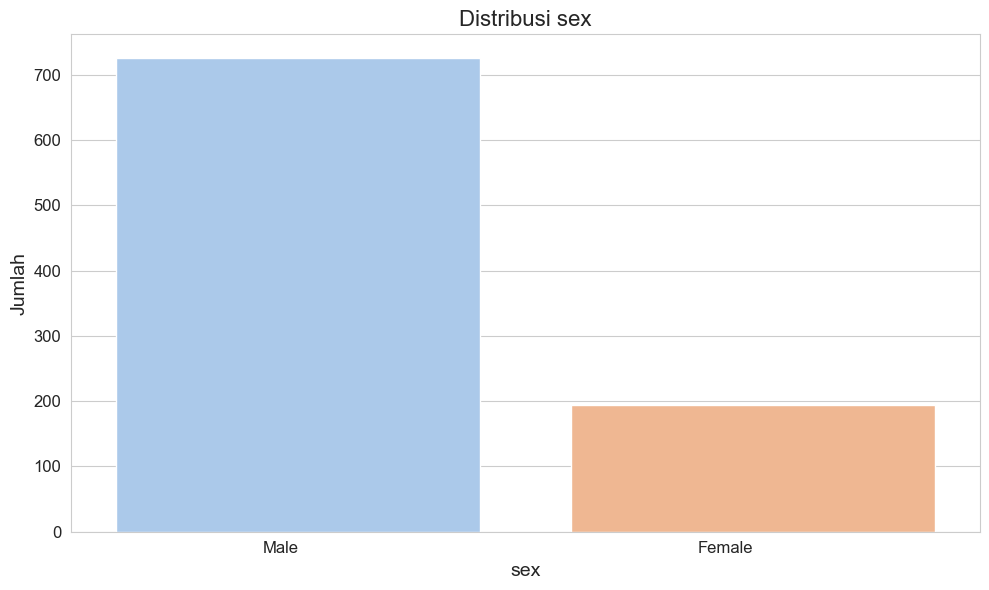

C:\Users\USER\AppData\Local\Temp\ipykernel_3932\1114362834.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='pastel', order=order)


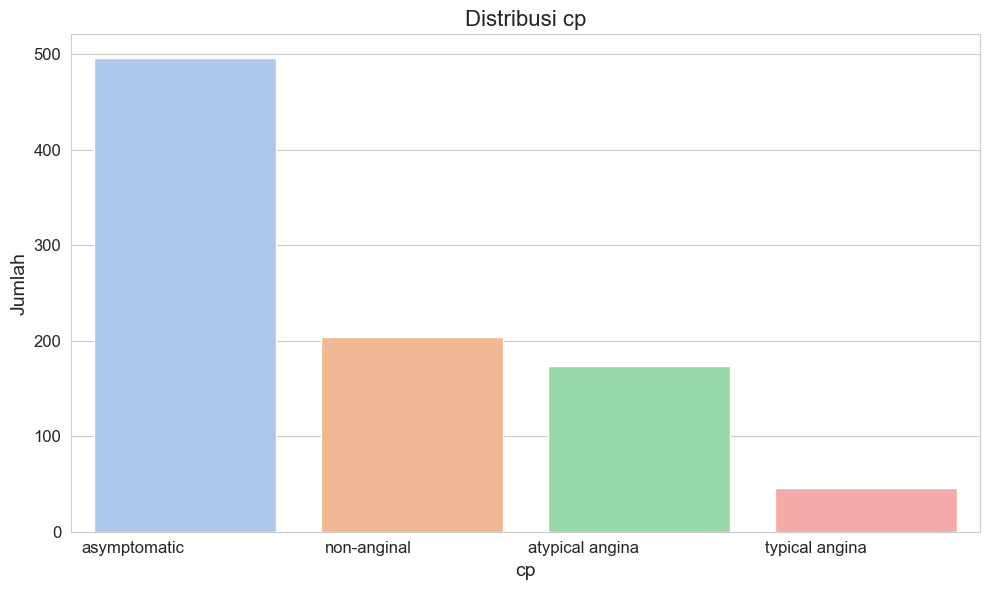

In [8]:
print("\n--- Analisis Univariat ---")

# Tentukan fitur numerik dan kategorikal yang ingin dianalisis
numerical_features_eda = ['age', 'chol', 'thalch']  # Fitur numerik yang ingin dianalisis
categorical_features_eda = ['sex', 'cp']  # Fitur kategorikal yang ingin dianalisis

print(f"\nIdentifikasi Fitur Numerik untuk EDA: {numerical_features_eda}")
print(f"Identifikasi Fitur Kategorikal untuk EDA: {categorical_features_eda}")

# Distribusi Fitur Numerik
if numerical_features_eda:
    print("\nDistribusi Fitur Numerik:")
    for col in numerical_features_eda:
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            sns.histplot(df[col].dropna(), kde=True, color='skyblue') # dropna() untuk histplot
            plt.title(f'Distribusi {col}')

            plt.subplot(1, 2, 2)
            sns.boxplot(y=df[col].dropna(), color='lightcoral') # dropna() untuk boxplot
            plt.title(f'Boxplot {col}')
            plt.tight_layout()
            plt.show()
else:
    print("Tidak ada fitur numerik yang teridentifikasi untuk diplot.")

# Distribusi Fitur Kategorikal
if categorical_features_eda:
    print("\nDistribusi Fitur Kategorikal:")
    for col in categorical_features_eda:
        if col in df.columns:
            plt.figure(figsize=(10, 6))
            order = df[col].value_counts().index
            sns.countplot(x=col, data=df, palette='pastel', order=order)
            plt.title(f'Distribusi {col}')
            plt.xlabel(col)
            plt.ylabel('Jumlah')
            plt.xticks(rotation=0, ha='right')
            plt.tight_layout()
            plt.show()


Di sini, kita menganalisis setiap fitur secara individual. Untuk fitur numerik (seperti age, chol), kita membuat histogram dan boxplot untuk memahami distribusinya. Untuk fitur kategorikal (seperti sex, cp), kita menggunakan countplot untuk melihat frekuensi setiap kategori.


--- Analisis Bivariat (Fitur vs. Target) ---

Fitur Numerik vs. Target:


C:\Users\USER\AppData\Local\Temp\ipykernel_3932\1054274872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='coolwarm')


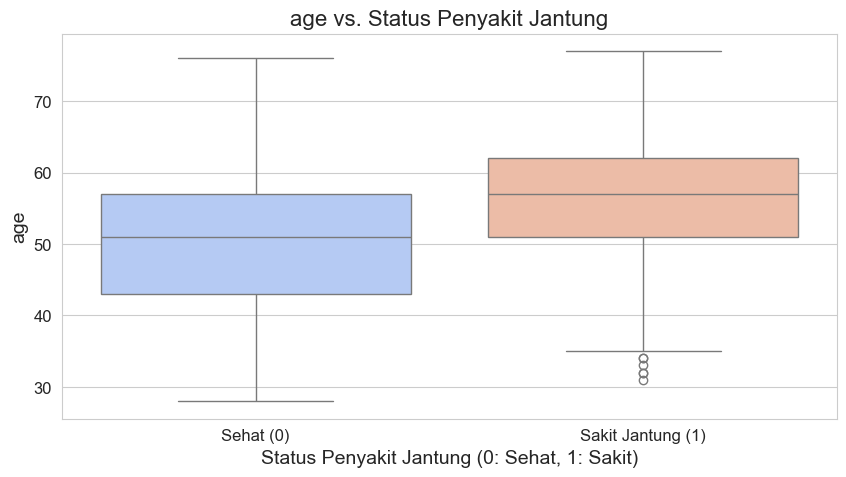

C:\Users\USER\AppData\Local\Temp\ipykernel_3932\1054274872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='coolwarm')


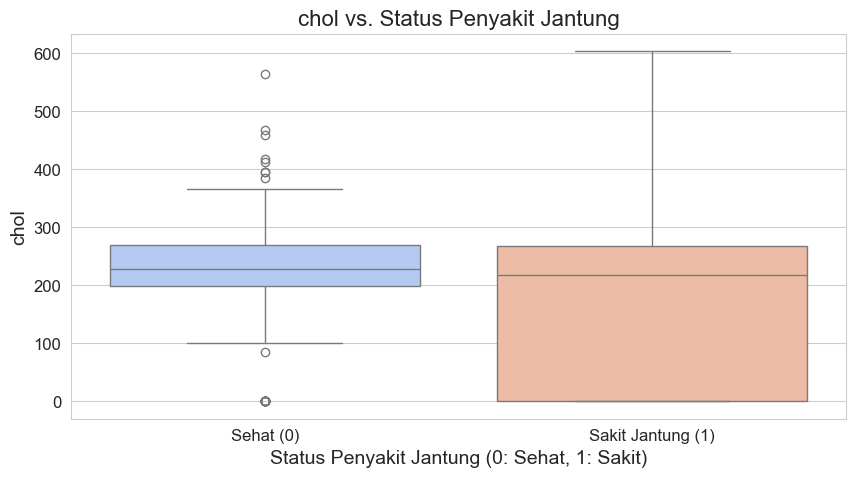

C:\Users\USER\AppData\Local\Temp\ipykernel_3932\1054274872.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df, palette='coolwarm')


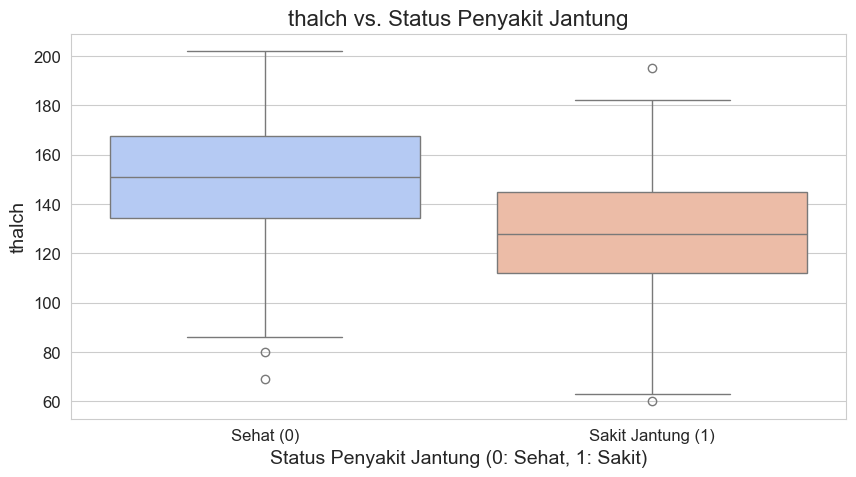


Fitur Kategorikal vs. Target:


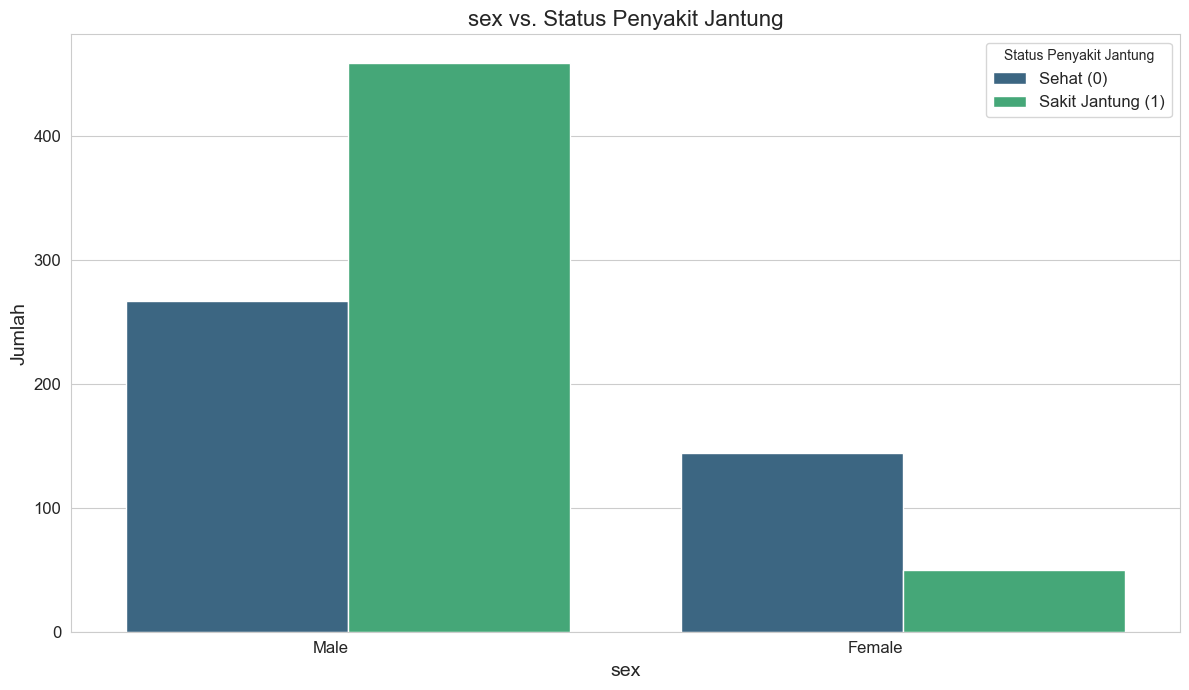

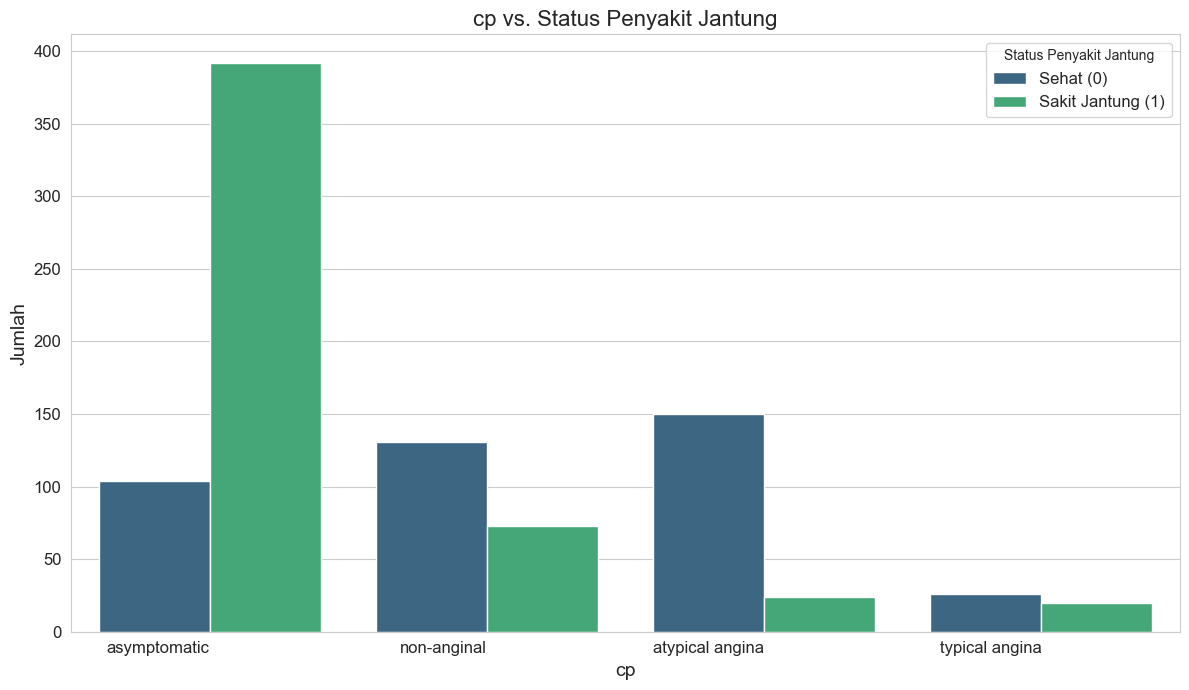

In [9]:
print("\n--- Analisis Bivariat (Fitur vs. Target) ---")
if 'target' in df.columns:
    if numerical_features_eda:
        print("\nFitur Numerik vs. Target:")
        for col in numerical_features_eda:
            if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
                plt.figure(figsize=(10, 5))
                sns.boxplot(x='target', y=col, data=df, palette='coolwarm')
                plt.title(f'{col} vs. Status Penyakit Jantung')
                plt.xlabel('Status Penyakit Jantung (0: Sehat, 1: Sakit)')
                plt.ylabel(col)
                plt.xticks([0, 1], ['Sehat (0)', 'Sakit Jantung (1)'])
                plt.show()

    if categorical_features_eda:
        print("\nFitur Kategorikal vs. Target:")
        for col in categorical_features_eda:
            if col in df.columns:
                plt.figure(figsize=(12, 7))
                order = df[col].value_counts().index
                sns.countplot(x=col, hue='target', data=df, palette='viridis', order=order)
                plt.title(f'{col} vs. Status Penyakit Jantung')
                plt.xlabel(col)
                plt.ylabel('Jumlah')
                plt.xticks(rotation=0, ha='right')
                plt.legend(title='Status Penyakit Jantung', labels=['Sehat (0)', 'Sakit Jantung (1)'])
                plt.tight_layout()
                plt.show()
else:
    print("Analisis Bivariat tidak dapat dilakukan karena kolom 'target' tidak ada.")


Tahap ini bertujuan untuk melihat hubungan antara masing-masing fitur dengan variabel target. Untuk fitur numerik, kita menggunakan boxplot yang dikelompokkan berdasarkan target untuk membandingkan distribusinya antara pasien sehat dan sakit. Untuk fitur kategorikal, kita menggunakan countplot dengan hue='target' untuk melihat proporsi sehat/sakit di setiap kategori.

## Preprocessing Data

In [10]:
target_column_name = 'num'  # Asumsi kolom target adalah 'num'

df[target_column_name] = pd.to_numeric(df[target_column_name], errors='coerce')
df.dropna(subset=[target_column_name], inplace=True)
print(f"\nDataset setelah pembersihan:")
df.info()


Dataset setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
 16  target    920 non-null    int64  
dtypes: float64(5), int64(4), object(8)
memory usage: 122.3+ KB


In [11]:
df['target'] = (df[target_column_name] > 0).astype(int)
df_processed = df.drop(target_column_name, axis=1).copy()

numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']

transformers_list = []
if numerical_features:
    numerical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                                            ('scaler', StandardScaler())])
    transformers_list.append(('num', numerical_transformer, numerical_features))

if categorical_features:
    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                               ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
    transformers_list.append(('cat', categorical_transformer, categorical_features))

preprocessor = ColumnTransformer(transformers=transformers_list, remainder='drop')


Untuk fitur numerik: Nilai yang hilang diisi dengan nilai median (SimpleImputer), kemudian nilainya diskalakan agar memiliki rentang yang seragam (StandardScaler).

Untuk fitur kategorikal: Nilai yang hilang diisi dengan nilai yang paling sering muncul (modus), kemudian diubah menjadi format numerik menggunakan One-Hot Encoding.

## Modeling

In [12]:
X = df_processed.drop(columns='target')
y = df_processed['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [13]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)


In [14]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_processed.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


Model deep learning dibangun menggunakan Sequential dari Keras. Arsitekturnya terdiri dari beberapa lapisan Dense (lapisan neuron), dengan BatchNormalization untuk menstabilkan pelatihan dan Dropout sebagai teknik regularisasi untuk mencegah overfitting. Lapisan terakhir menggunakan aktivasi sigmoid yang menghasilkan probabilitas antara 0 dan 1, cocok untuk klasifikasi biner.

In [15]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(name='precision'), tf.keras.metrics.Recall(name='recall'), tf.keras.metrics.AUC(name='auc')])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3712      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

Model dikonfigurasi dengan optimizer='adam', loss='binary_crossentropy', dan beberapa metrik seperti accuracy, precision, recall, dan auc untuk memantau performanya selama pelatihan.

In [16]:
early_stopping = EarlyStopping(monitor='val_auc', patience=25, mode='max', restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.00001, verbose=1)

history = model.fit(
    X_train_processed, y_train, epochs=200, batch_size=16,
    validation_data=(X_test_processed, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)


Epoch 1/200
46/46 [==============================] - 2s 10ms/step - loss: 0.6611 - accuracy: 0.6345 - precision: 0.6949 - recall: 0.6044 - auc: 0.7133 - val_loss: 0.6015 - val_accuracy: 0.7337 - val_precision: 0.8630 - val_recall: 0.6176 - val_auc: 0.8638 - lr: 0.0010
Epoch 2/200
46/46 [==============================] - 0s 3ms/step - loss: 0.5524 - accuracy: 0.7296 - precision: 0.7971 - recall: 0.6855 - auc: 0.8064 - val_loss: 0.5624 - val_accuracy: 0.7446 - val_precision: 0.9104 - val_recall: 0.5980 - val_auc: 0.8848 - lr: 0.0010
Epoch 3/200
46/46 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7582 - precision: 0.7974 - recall: 0.7543 - auc: 0.8324 - val_loss: 0.5266 - val_accuracy: 0.7500 - val_precision: 0.8889 - val_recall: 0.6275 - val_auc: 0.8889 - lr: 0.0010
Epoch 4/200
46/46 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.7826 - precision: 0.8208 - recall: 0.7764 - auc: 0.8639 - val_loss: 0.4828 - val_accuracy: 0.7826 - v

Model dilatih menggunakan model.fit() pada data latih. Dua callbacks penting digunakan: EarlyStopping untuk menghentikan pelatihan jika performa tidak lagi meningkat, dan ReduceLROnPlateau untuk menyesuaikan learning rate secara dinamis.

In [17]:
from sklearn.metrics import classification_report

# Evaluasi model
results = model.evaluate(X_test_processed, y_test, verbose=0)
print("\nHasil Evaluasi Model pada Data Uji:")
for name, value in zip(model.metrics_names, results):
    print(f"{name}: {value:.4f}")

# Prediksi pada data uji
y_pred = (model.predict(X_test_processed) > 0.5).astype("int32")

# Tampilkan Classification Report
report = classification_report(y_test, y_pred, target_names=['Sehat (0)', 'Sakit Jantung (1)'])
print("\nClassification Report:")
print(report)



Hasil Evaluasi Model pada Data Uji:
loss: 0.3401
accuracy: 0.8696
precision: 0.8679
recall: 0.9020
auc: 0.9249
6/6 [==============================] - 0s 1ms/step

Classification Report:
                   precision    recall  f1-score   support

        Sehat (0)       0.87      0.83      0.85        82
Sakit Jantung (1)       0.87      0.90      0.88       102

         accuracy                           0.87       184
        macro avg       0.87      0.87      0.87       184
     weighted avg       0.87      0.87      0.87       184



Setelah pelatihan selesai, performa model dievaluasi menggunakan data uji yang belum pernah dilihat sebelumnya. classification_report dari sklearn digunakan untuk mendapatkan laporan lengkap berisi precision, recall, dan f1-score, yang memberikan gambaran detail tentang seberapa baik model dapat membedakan antara pasien sehat dan sakit jantung. dari output tersebut model menghasilkan akurasi 0.85

In [18]:
model_filename = 'heart_disease_prediction_model.h5'
model.save(model_filename)
print(f"Model berhasil disimpan sebagai {model_filename}")

# Simpan preprocessor yang sudah di-fit
preprocessor_filename = 'heart_disease_preprocessor.joblib'
joblib.dump(preprocessor, preprocessor_filename)
print(f"Preprocessor berhasil disimpan sebagai {preprocessor_filename}")

Model berhasil disimpan sebagai heart_disease_prediction_model.h5
Preprocessor berhasil disimpan sebagai heart_disease_preprocessor.joblib


c:\Users\USER\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




*   model.save(): Menyimpan arsitektur dan bobot model yang telah dilatih ke dalam sebuah file .h5.

*   Ljoblib.dump(): Menyimpan objek preprocessor yang telah "belajar" dari data latih ke dalam sebuah file .joblib.




Menyimpan kedua file ini memastikan bahwa kita dapat melakukan prediksi pada data baru dengan konsisten, menggunakan pemrosesan yang sama persis seperti saat pelatihan.

## Inference

In [ ]:
# --- Muat Model dan Preprocessor ---
# Tentukan path ke file-file artefak Anda
MODEL_FILENAME = 'heart_disease_prediction_model.h5'
PREPROCESSOR_FILENAME = 'heart_disease_preprocessor.joblib'

model = None
preprocessor = None
model_loaded_successfully = False

print("Mencoba memuat model dan preprocessor...")

# Cek file ada sebelum mencoba memuat
if not os.path.exists(MODEL_FILENAME):
    print(f"ERROR: File model '{MODEL_FILENAME}' tidak ditemukan.")
elif not os.path.exists(PREPROCESSOR_FILENAME):
    print(f"ERROR: File preprocessor '{PREPROCESSOR_FILENAME}' tidak ditemukan.")
else:
    try:
        model = tf.keras.models.load_model(MODEL_FILENAME)
        preprocessor = joblib.load(PREPROCESSOR_FILENAME)
        print("Model dan Preprocessor berhasil dimuat ke memori.")
        model.summary()
        model_loaded_successfully = True
    except Exception as e:
        print(f"Terjadi error saat memuat artefak: {e}")

# --- Buat Fungsi Prediksi ---
def predict_heart_disease(input_data_dict):
    """
    Memprediksi penyakit jantung berdasarkan data input.

    Args:
        input_data_dict (dict): Sebuah dictionary Python dengan fitur-fitur pasien.

    Returns:
        dict: Hasil prediksi berisi probabilitas, tingkat risiko, dan interpretasi,
              atau None jika terjadi error.
    """
    if not model_loaded_successfully:
        print("ERROR: Model/Preprocessor tidak siap. Tidak dapat melakukan prediksi.")
        return None

    try:
        # Konversi input dictionary ke DataFrame Pandas
        # Penting: Preprocessor yang disimpan sudah tahu urutan kolom yang benar,
        # jadi kita hanya perlu membuat DataFrame dari dictionary.
        input_df = pd.DataFrame([input_data_dict])

        # Terapkan pra-pemrosesan yang SAMA (TANPA fit ulang!)
        input_processed = preprocessor.transform(input_df)

        # Lakukan prediksi
        prediction_proba = model.predict(input_processed)
        probability = prediction_proba[0][0]

        # Interpretasi hasil dengan tingkatan risiko
        risk_level = ""
        interpretation_text = ""
        if probability < 0.3:
            risk_level = "Rendah"
            interpretation_text = "Berdasarkan data Anda, risiko penyakit jantung tergolong rendah."
        elif probability < 0.7:
            risk_level = "Sedang"
            interpretation_text = "Ada indikasi risiko penyakit jantung sedang. Disarankan untuk menjaga pola hidup sehat dan berkonsultasi lebih lanjut dengan dokter."
        else:
            risk_level = "Tinggi"
            interpretation_text = "Risiko penyakit jantung tergolong tinggi. Kami sangat menyarankan Anda untuk segera berkonsultasi dengan dokter untuk evaluasi dan penanganan."

        # Kembalikan hasil dalam format dictionary
        return {
            "probability_penyakit_jantung": float(probability),
            "tingkat_risiko": risk_level,
            "interpretasi": interpretation_text
        }
    except Exception as e:
        print(f"Terjadi error saat prediksi: {e}")
        print("Pastikan semua fitur yang dibutuhkan ada dalam input dictionary dan formatnya benar.")
        return None

# --- Contoh Penggunaan --
if __name__ == "__main__":
    if model_loaded_successfully:
        print("\n" + "="*50)
        print("Menjalankan Contoh Prediksi...")
        print("="*50)

        # Skenario 1: Pasien dengan profil risiko tinggi
        pasien_risiko_tinggi = {
            'age': 65,
            'sex': 'Male',
            'cp': 'asymptomatic',
            'trestbps': 160,
            'chol': 280,
            'fbs': 'TRUE',
            'restecg': 'lv hypertrophy',
            'thalch': 110,
            'exang': 'TRUE',
            'oldpeak': 2.5,
            'slope': 'flat',
            'ca': 3,
            'thal': 'reversable defect'
        }

        print("\n--- Memprediksi Skenario Pasien Risiko Tinggi ---")
        hasil_risiko_tinggi = predict_heart_disease(pasien_risiko_tinggi)

        if hasil_risiko_tinggi:
            print(f"Probabilitas Penyakit Jantung: {hasil_risiko_tinggi['probability_penyakit_jantung']:.4f}")
            print(f"Tingkat Risiko: {hasil_risiko_tinggi['tingkat_risiko']}")
            print(f"Interpretasi: {hasil_risiko_tinggi['interpretasi']}")

        print("\n" + "="*50)

        # Skenario 2: Pasien dengan profil risiko rendah
        pasien_risiko_rendah = {
            'age': 40,
            'sex': 'Female',
            'cp': 'non-anginal',
            'trestbps': 120,
            'chol': 200,
            'fbs': 'FALSE',
            'restecg': 'normal',
            'thalch': 160,
            'exang': 'FALSE',
            'oldpeak': 0.0,
            'slope': 'upsloping',
            'ca': 0,
            'thal': 'normal'
        }

        print("\n--- Memprediksi Skenario Pasien Risiko Rendah ---")
        hasil_risiko_rendah = predict_heart_disease(pasien_risiko_rendah)

        if hasil_risiko_rendah:
            print(f"Probabilitas Penyakit Jantung: {hasil_risiko_rendah['probability_penyakit_jantung']:.4f}")
            print(f"Tingkat Risiko: {hasil_risiko_rendah['tingkat_risiko']}")
            print(f"Interpretasi: {hasil_risiko_rendah['interpretasi']}")

        print("\n" + "="*50)

    else:
        print("\nContoh prediksi tidak dapat dijalankan karena model atau preprocessor gagal dimuat.")


Mencoba memuat model dan preprocessor...
Model dan Preprocessor berhasil dimuat ke memori.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3712      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                               